In [3]:
# Also see the executable and distributed versions in the same folder.

%reload_ext autoreload
%autoreload 2

import os
import sys

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from visualization_utilities import *
from metadata import *
from utilities2015 import *
from data_manager import *
from learning_utilities import *

Setting environment for AWS compute node
rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


No vtk
Child returned 0
Child returned 1
0.38 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.38 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


In [4]:
stack = 'MD589'
downsample_factor = 8

In [5]:
contours_df, _ = DataManager.load_annotation_v3(stack=stack)
contours = contours_df[(contours_df['orientation'] == 'sagittal') & (contours_df['downsample'] == 1)]
contours = contours.drop_duplicates(subset=['section', 'name', 'side', 'filename', 'downsample', 'creator'])
contours = convert_annotation_v3_original_to_aligned_cropped(contours, stack=stack)

'No object named structures in the file'


Annotation has no structures.


In [6]:
structure_colors = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures}

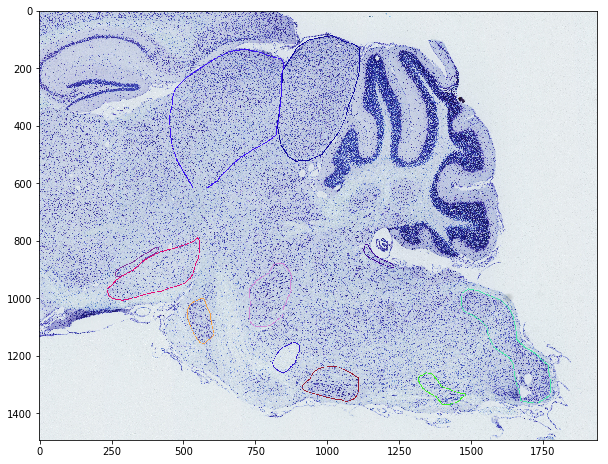

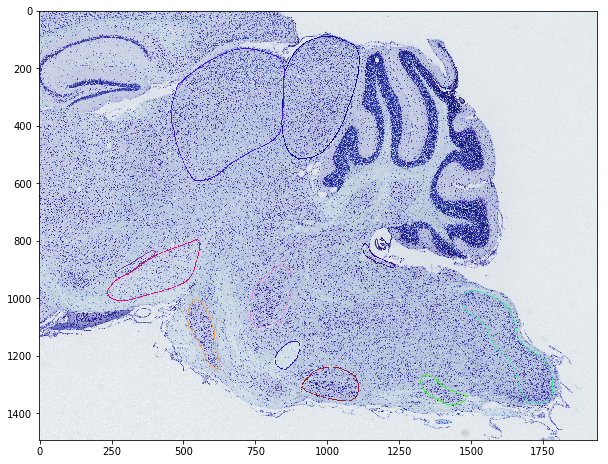

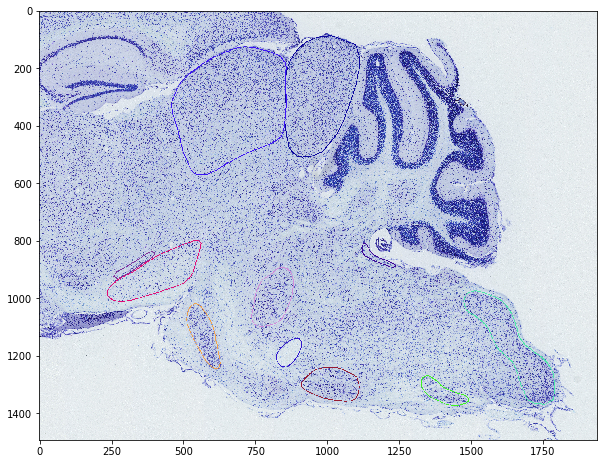

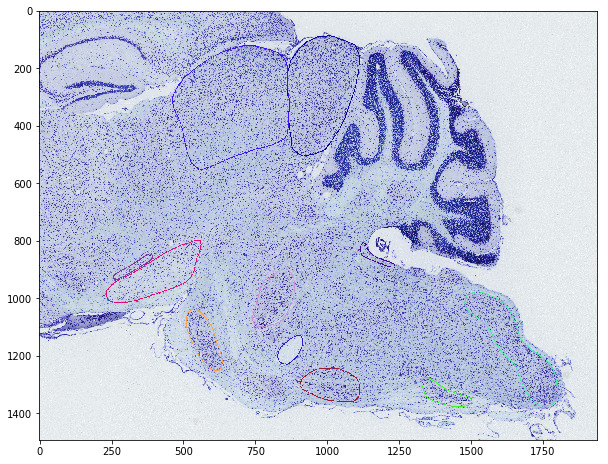

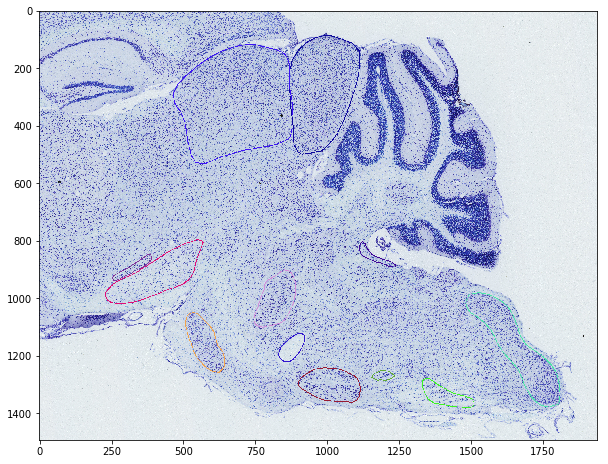

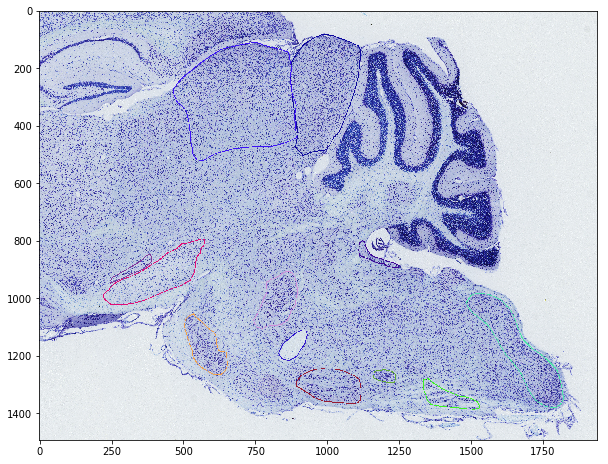

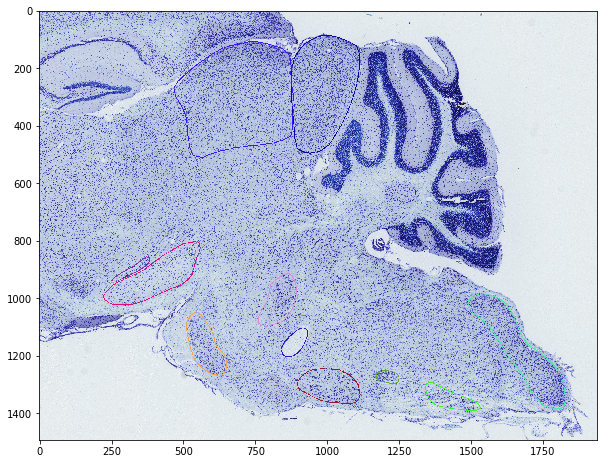

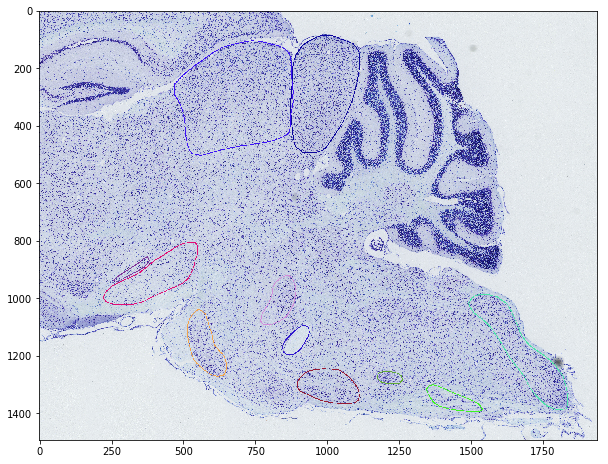

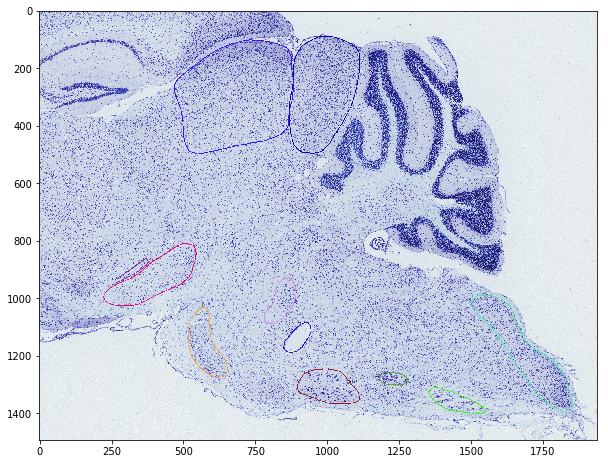

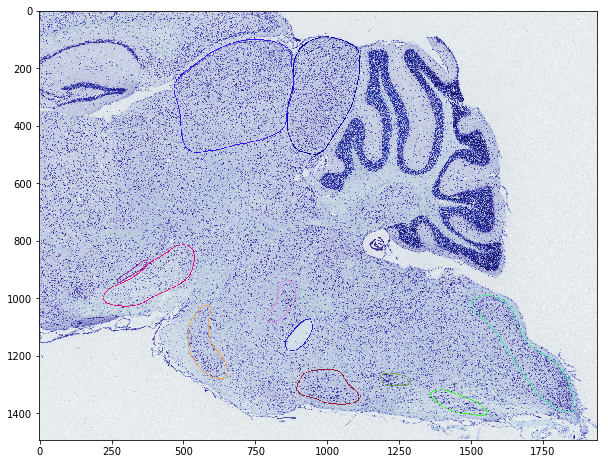

In [25]:
for sec in range(160, 170):
    fn = metadata_cache['sections_to_filenames'][stack][sec]

    img = imread(DataManager.get_image_filepath(stack, fn=fn, resol='lossless', version='compressed'))
    viz = img[::downsample_factor, ::downsample_factor].copy()

    for name_u, color in structure_colors.iteritems():
        matched_contours = contours[(contours['name'] == name_u) & (contours['filename'] == fn)]
        for cnt_id, cnt_props in matched_contours.iterrows():
            cv2.polylines(viz, [(cnt_props['vertices']/downsample_factor).astype(np.int)], True, color, 2)

    plt.figure(figsize=(10,10));
    plt.imshow(viz);
    plt.show();

In [8]:
def generate_annotation_viz_one_section(fn, structure_colors, downsample_factor):
    global contours, stack
    
    if is_invalid(fn):
        return
    
    img = imread(DataManager.get_image_filepath(stack, fn=fn, resol='lossless', version='compressed'))
    viz = img[::downsample_factor, ::downsample_factor].copy()
    
    for name_u, color in structure_colors.iteritems():
        matched_contours = contours[(contours['name'] == name_u) & (contours['filename'] == fn)]
        for cnt_id, cnt_props in matched_contours.iterrows():
            cv2.polylines(viz, [(cnt_props['vertices']/downsample_factor).astype(np.int)], True, color, 2)
    
    viz_fp = DataManager.get_annotation_viz_filepath(stack=stack, fn=fn)
    create_parent_dir_if_not_exists(viz_fp)
    imsave(viz_fp, viz)
    upload_to_s3(viz_fp)

In [6]:
generate_annotation_viz_one_section(fn='MD589-N36-2015.07.30-18.28.52_MD589_2_0107', 
                       structure_colors=structure_colors, downsample_factor=downsample_factor)

/usr/local/lib/python2.7/dist-packages/PIL/Image.py:2371: DecompressionBombWarning: Image size (185246720 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


aws s3 cp /shared/CSHL_annotation_viz/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_annotation_viz.tif s3://mousebrainatlas-data/CSHL_annotation_viz/MD589/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_annotation_viz.tif


Child returned 0
0.78 seconds.
